In [4]:
import os
import sys
import argparse
import logging
import shutil
from sklearn.decomposition import PCA
import pickle
import pandas as pd

logging.captureWarnings(True)

import matplotlib

if sys.platform == 'linux':
    print('Use non-interactive Agg backend for matplotlib on linux')
    matplotlib.use('Agg')

import matplotlib.pyplot as plt
import numpy as np
import torch

sys.path.append('..')
from mdlearn import fitting, visualize, metrics, preprocessing, validation, dataloader

In [2]:
class OPT():
    def __init__(self):
        pass
    
opt = OPT()
opt.input = '../data/C123-npt-1bar.txt'
opt.target = 'einter'
opt.fp = '../run/C123/fp/fp_morgan1,../run/C123/fp/fp_simple'
opt.featrm = ''
opt.part = '../run/C123/out/part-1.txt'
opt.output = '../run/C123/out'
opt.layer = '32,16,8'

In [1]:
class OPT():
    def __init__(self):
        pass

opt = OPT()
opt.input = '../data/result-ML-CH-cp.txt'
opt.target = 'cp'
opt.fp = '../run/CH-cp/fp/fp_morgan1,../run/CH-cp/fp/fp_simple'
opt.featrm = ''
opt.part = '../run/CH-cp/out/part-1.txt'
opt.output = '../run/CH-cp/out'
opt.layer = '32,16,8'

In [2]:
def load_data(opt):
    if opt.layer != "":
        layers = list(map(int, opt.layer.split(',')))
    else:
        layers = []

    if not os.path.exists(opt.output):
        os.mkdir(opt.output)

    if opt.featrm == 'auto':
        logger.info('Automatically remove features')
        featrm = [14, 15, 17, 18, 19, 20, 21, 22]
    elif opt.featrm == '':
        featrm = []
    else:
        featrm = list(map(int, opt.featrm.split(',')))

    datax, datay, data_names = dataloader.load(filename=opt.input, target=opt.target, fps=opt.fp.split(','), featrm=featrm)

    selector = preprocessing.Selector(datax, datay, data_names)
    if opt.part:
        selector.load(opt.part)
    else:
        selector.partition(0.8, 0.1)
        selector.save(opt.output + '/part.txt')
        
    trainx, trainy, trainname = selector.training_set()
    validx, validy, validname = selector.validation_set()
    '''
    scaler = preprocessing.Scaler()
    scaler.fit(trainx)
    scaler.save(opt.output + '/scale.txt')
    normed_trainx = scaler.transform(trainx)
    normed_validx = scaler.transform(validx)
    '''
    model = fitting.TorchMLPRegressor(None, None, [],
                                      is_gpu= False,
                                      )
    model.load(opt.output + '/model.pt')
    
    return trainx, trainy, validx, validy, trainname, validname, model

In [10]:
from IPython.display import SVG
import matplotlib.image as mpimg

svg_files = list(os.listdir('../run/CH-cp/fp/fp-svg_morgan1'))
svg_files.remove('png')
svg_files.remove('svg2png.py')
with open('../run/CH-cp/fp/fp_morgan1.idx') as file:
    all_the_text = file.read()
fp_idx = {int(fp):idx for idx,fp in enumerate(all_the_text.split('\n')[:-1])}

class fp_svg():
    def __init__(self, svg_file, fp_idx):
        self.freq = int(svg_file.split('-')[0])
        self.fp = int(svg_file.split('-')[1])
        self.fp_name = svg_file.split('-')[2].split('.')[0]
        self.idx = fp_idx[self.fp] 
        with open('../run/CH-cp/fp/fp-svg_morgan1/'+svg_file) as file:
            self.svg = file.read()
        self.png = mpimg.imread('../run/CH-cp/fp/fp-svg_morgan1/png/'+svg_file.split('.')[0]+'.png')
fp_svgs = sorted([fp_svg(file_name, fp_idx) for file_name in svg_files], key=lambda x: x.idx ) 

In [16]:
fp_idx

{98513984: 0,
 422715066: 1,
 517457164: 2,
 951226070: 3,
 994485099: 4,
 1167268241: 5,
 1173125914: 6,
 1228815484: 7,
 1236995907: 8,
 1275679867: 9,
 1276993226: 10,
 1505769767: 11,
 1506563592: 12,
 1510461303: 13,
 1583009052: 14,
 1583799011: 15,
 1730555933: 16,
 1858577693: 17,
 1861965050: 18,
 2117068077: 19,
 2119439498: 20,
 2142032900: 21,
 2245273601: 22,
 2245277810: 23,
 2245384272: 24,
 2246699815: 25,
 2246703798: 26,
 2246728737: 27,
 2246997334: 28,
 2361265913: 29,
 2423543607: 30,
 2968968094: 31,
 2974534217: 32,
 2976033787: 33,
 2976816164: 34,
 3004333805: 35,
 3103812183: 36,
 3124581743: 37,
 3207567135: 38,
 3217380708: 39,
 3218693969: 40,
 3537119515: 41,
 3537123720: 42,
 3542456614: 43,
 3545353036: 44,
 3545365497: 45,
 3696389118: 46,
 3696402029: 47,
 4121755354: 48}

In [15]:
svg_files

['1010-3217380708-c.svg',
 '1038-3218693969-c.svg',
 '1124-3537119515-CC.svg',
 '1238-2968968094-C.svg',
 '1261-2245273601-C.svg',
 '152-2361265913-C(C)(C)C.svg',
 '155-3207567135-c(c)(c)C.svg',
 '157-1730555933-C(C)(C)C.svg',
 '161-3004333805-C(C)(C)C.svg',
 '162-2974534217-C(C)(C)C.svg',
 '164-1275679867-C(C)C.svg',
 '1645-3542456614-CC.svg',
 '165-4121755354-c(c)(c)C.svg',
 '167-2119439498-C(C)C.svg',
 '178-3124581743-c(c)(c)C.svg',
 '179-1167268241-C(C)C.svg',
 '181-1236995907-C(C)(C)C.svg',
 '181-3545353036-CC.svg',
 '185-1228815484-C(C)(C)C.svg',
 '196-3696389118-C=C.svg',
 '2030-2245384272-C.svg',
 '219-3103812183-C(C)(C)C.svg',
 '229-994485099-c(c)c.svg',
 '230-1861965050-CC.svg',
 '232-517457164-C(C)C.svg',
 '239-1583009052-C(C)C.svg',
 '242-3696402029-C=C.svg',
 '243-1505769767-C(C)C.svg',
 '260-2976816164-C.svg',
 '288-1276993226-C(c)C.svg',
 '2886-2246728737-C.svg',
 '311-2423543607-C(C)(C)C.svg',
 '360-3545365497-CC.svg',
 '424-422715066-Cc.svg',
 '434-1506563592-C(C)C.svg

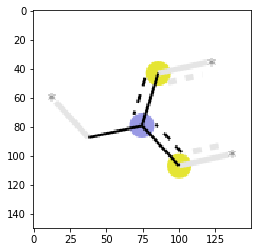

In [14]:
for each in fp_svgs:
    plt.imshow(each.png)

In [5]:
with open(opt.output + '/sobol_idx.pkl', 'rb') as file:
    sobol_idx = pickle.load(file)
with open(opt.output + '/sobol_S1.pkl', 'rb') as file:
    sobol_S1 = pickle.load(file)

In [6]:
trainx, trainy, validx, validy, trainnames, validnames, model = load_data(opt)

In [7]:
scaler = preprocessing.Scaler()
scaler.load(opt.output + '/scale.txt')
# normed_trainx = scaler.transform(trainx)
normed_validx = scaler.transform(validx)
predy = model.predict_batch(normed_validx)

In [8]:
idx_bigerr = abs((predy-validy)/validy)>0.03

In [9]:
idx_be = [] 
for i,item in enumerate(idx_bigerr):
    if item[0]==True:
        idx_be.append(i)

In [25]:
[unique_bad_validx, idx] = np.unique(validx[idx_be,:-2],axis=0, return_index=True)
[unique_validx, idx] = np.unique(validx[:,:-2],axis=0, return_index=True)

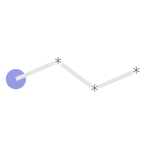

In [11]:
SVG(fp_svgs[0].svg)

In [12]:
# 
[unique_trainx, idx] = np.unique(trainx[:,:-2],axis=0,return_index=True)
unique_name = np.array(trainnames)[idx]

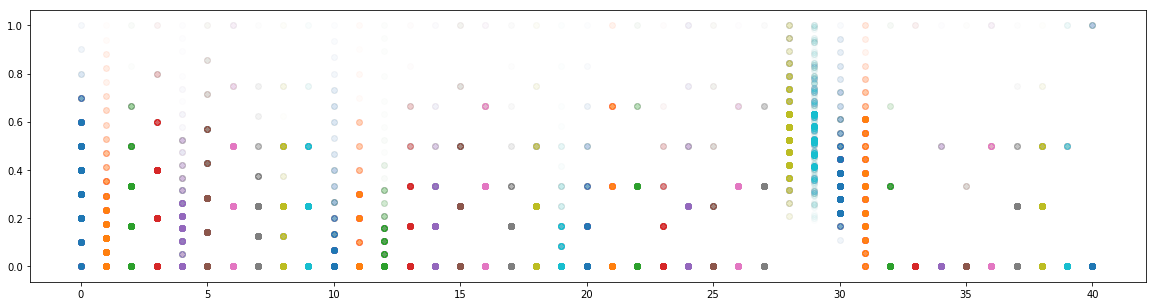

In [13]:
trainx_max = trainx.max(axis=0)
plt.figure(figsize=(20,5))
for k in range(41):
    plt.scatter([k for i in range(unique_trainx.shape[0])], unique_trainx[:,k]/trainx_max[k],alpha=0.01)

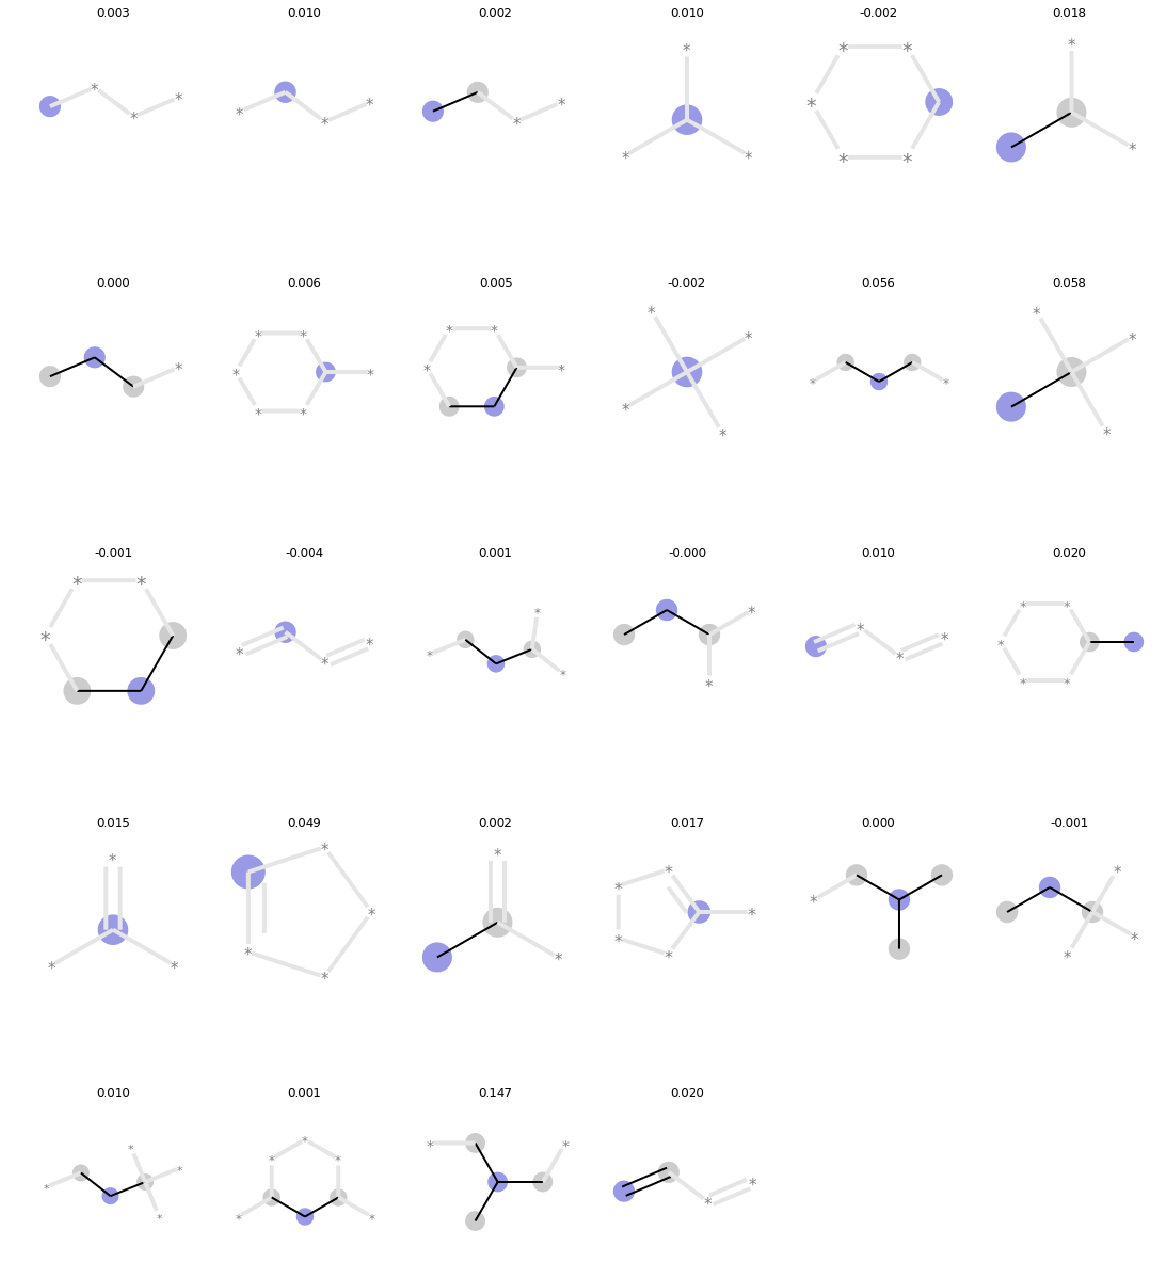

In [14]:
fig = plt.figure(figsize=(20,24))
for i in range(28):
    ax = fig.add_subplot(5,6,i+1)
    ax.axis('off')
    ax.imshow(fp_svgs[i].png)
    ax.title.set_text( '{:.3f}'.format(sobol_S1[i]) )

In [15]:
simple_feature = ['heavy atoms','molecular weight x10','Wiener length', 'rotatable bond', 'bridged ring', 'spiro ring', 'RR ring', 'R-R ring', '3R+4R', '5R', '6R', '7R+8R', '>8R']

In [63]:
#draw one card for each feature, sorted by sensitivity
def feature_card(n, sobol_idx, sobol_S1,fp_svgs,unique_trainx, unique_bad_validx,unique_validx, fontsize=15):
    idx = sobol_idx[-n]
    f = plt.figure(figsize=(10,5))
    gs = matplotlib.gridspec.GridSpec(3, 3)
    a0 = plt.subplot(gs[:, 0])
    a1 = plt.subplot(gs[0,1:])
    a2 = plt.subplot(gs[1,1:],sharex=a1)
    a3 = plt.subplot(gs[2,1:],sharex=a1)
    if idx<28: # if fp,
        a0.imshow(fp_svgs[idx].png)
        a0.axis('off')
        a0.title.set_text( '{:s}\nsensitivity:{:.3f},rank:{:d}-th\ntotal {:d} appearence in {:d} moleculars'.format(fp_svgs[idx].fp_name,sobol_S1[idx],n,int(sum(unique_trainx[:,idx])),int(sum(unique_trainx[:,idx]!=0))))
        a0.title.set_fontsize(fontsize)
        # convert data to 
    else:
        a0.text(0, 0.7, simple_feature[idx-28],fontsize= fontsize)
        a0.text(0, 0.5, 'sensitivity:{:.3f}\nrank:{:d}-th\ntotal {:d} appearence in {:d} moleculars'.format(sobol_S1[idx],n,int(sum(unique_trainx[:,idx])),int(sum(unique_trainx[:,idx]!=0)) ),fontsize= fontsize)
        a0.axis('off')
    bins_train = max(int(max(unique_trainx[:,idx])-min(unique_trainx[:,idx])),1)
    bins_valid = max(int(max(unique_validx[:,idx])-min(unique_validx[:,idx])),1)
    bins_valid_bad = max(int(max(unique_bad_validx[:,idx])-min(unique_bad_validx[:,idx])),1)
    # plot distribution
    a1.hist(unique_trainx[:,idx],align='left',bins=bins_train,rwidth=0.95)
    a1.title.set_text('train feature distribution')
    a1.title.set_fontsize(fontsize)
    a2.hist(unique_validx[:,idx],align='left',bins=bins_valid, color='darkorange',rwidth=0.95)
    a2.title.set_text('validation feature distribution')
    a2.title.set_fontsize(fontsize)
    # calculate/plot ratio
    valid_bad_count = np.bincount(unique_bad_validx[:,idx].astype(int)) 
    valid_count = np.bincount(unique_validx[:,idx].astype(int))
    valid_bad_count = np.pad(valid_bad_count, (0,len(valid_count)-len(valid_bad_count)), 'constant', constant_values=0 )
    a3.plot(valid_bad_count/valid_count)
    #a3.hist(unique_bad_validx[:,idx],align='left',bins=bins_valid_bad, color='darkorange',rwidth=0.95)
    a3.title.set_text('large validation error feature distribution')
    a3.title.set_fontsize(fontsize)
    f.tight_layout()
    if n<10:
        f.savefig('png/feature0'+str(n)+'.png')
    else:
        f.savefig('png/feature'+str(n)+'.png')

In [53]:
valid_bad_count = np.bincount(unique_bad_validx[:,3].astype(int)) 
valid_count = np.bincount(unique_validx[:,3].astype(int))
valid_bad_count = np.pad(valid_bad_count, (0,len(valid_count)-len(valid_bad_count)), 'constant', constant_values=0 )

In [54]:
valid_bad_count

array([79, 15,  7,  1,  0], dtype=int64)

In [58]:
valid_count

array([282,  87,  68,  33,   8], dtype=int64)

In [59]:
valid_bad_count / valid_count

array([0.28014184, 0.17241379, 0.10294118, 0.03030303, 0.        ])

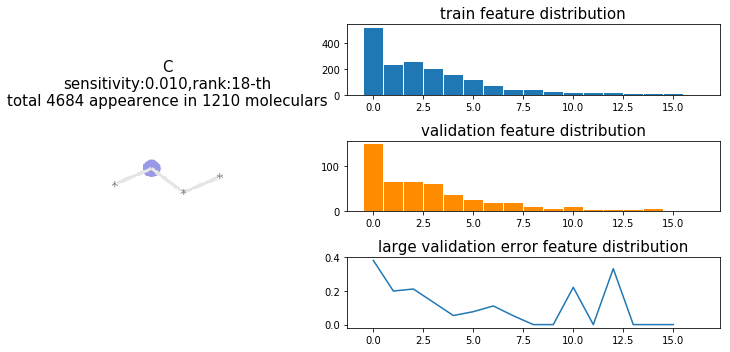

In [67]:
feature_card(18,sobol_idx, sobol_S1,fp_svgs,unique_trainx, unique_bad_validx, unique_validx)

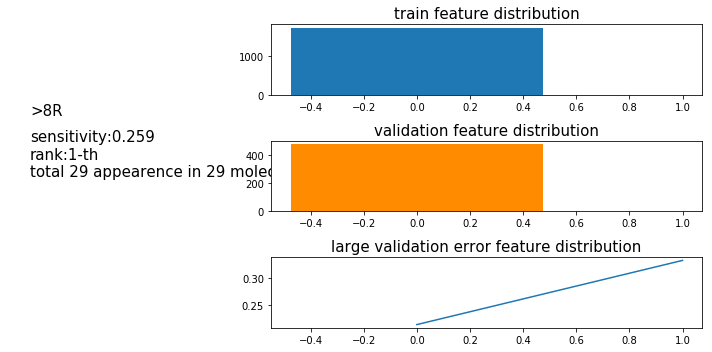

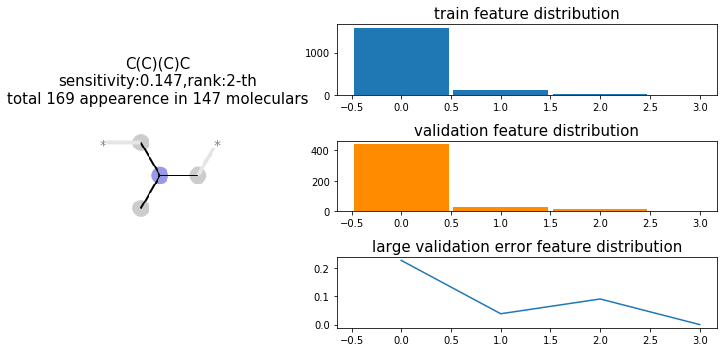

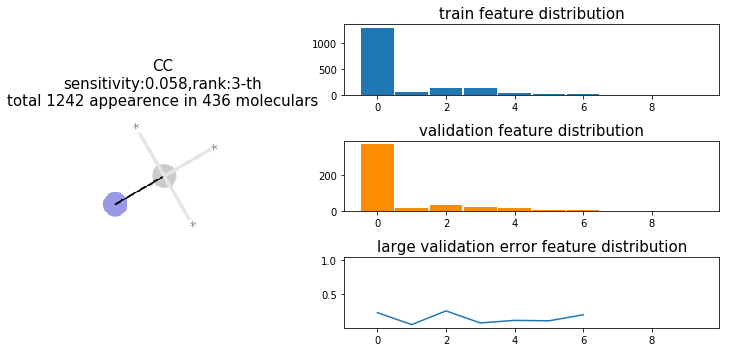

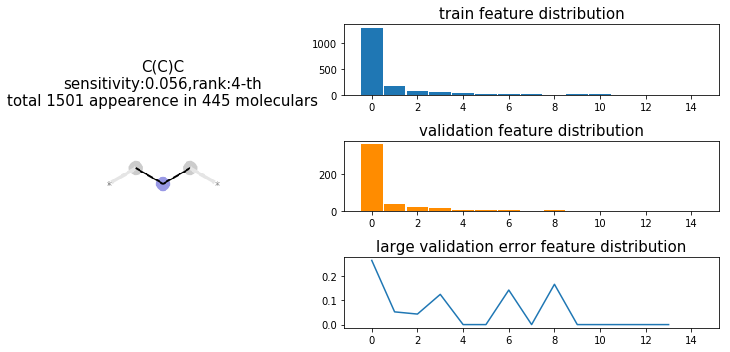

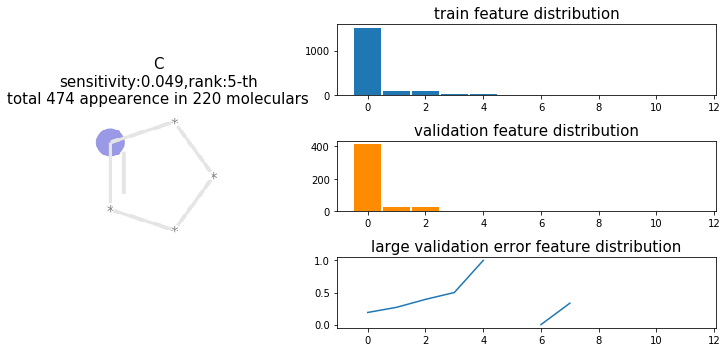

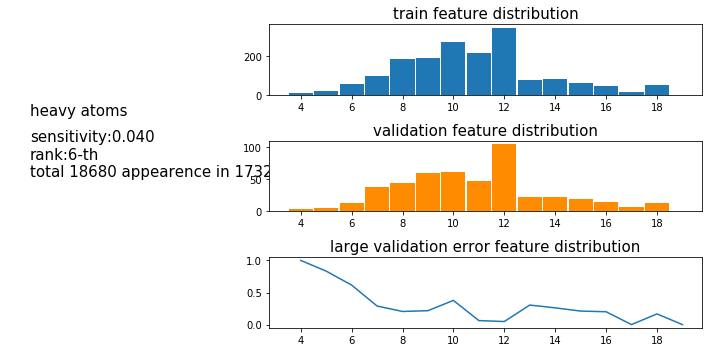

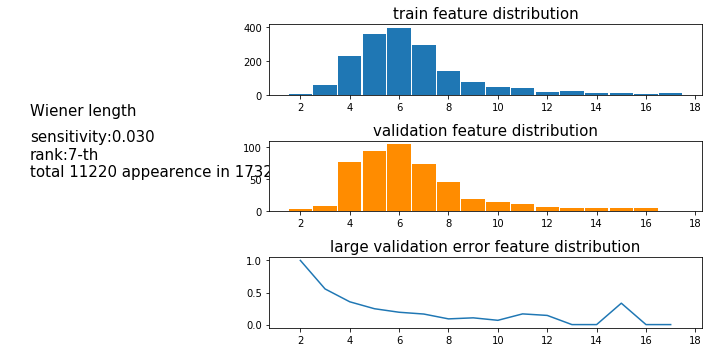

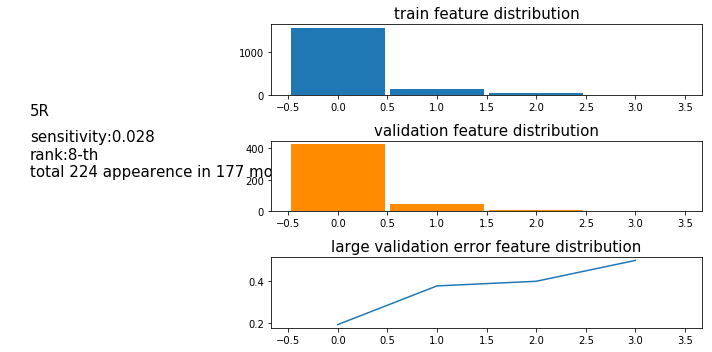

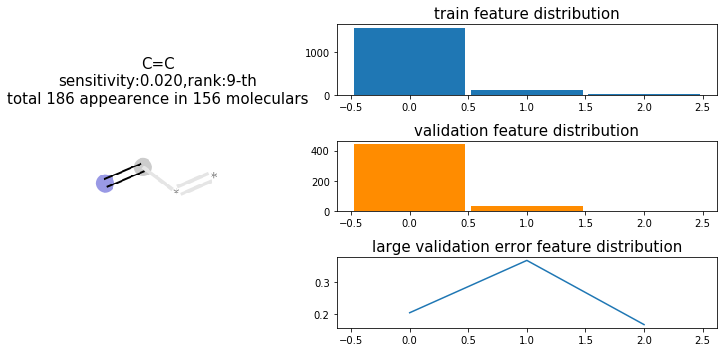

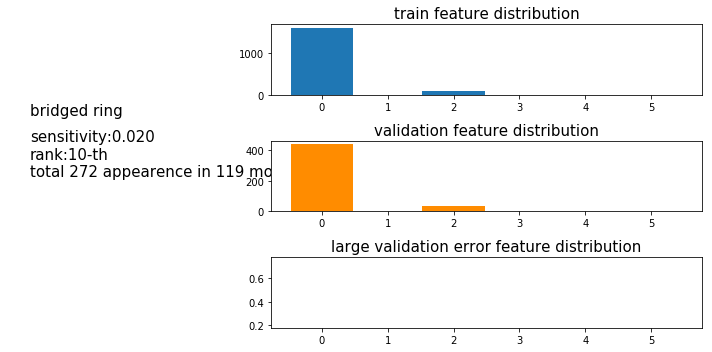

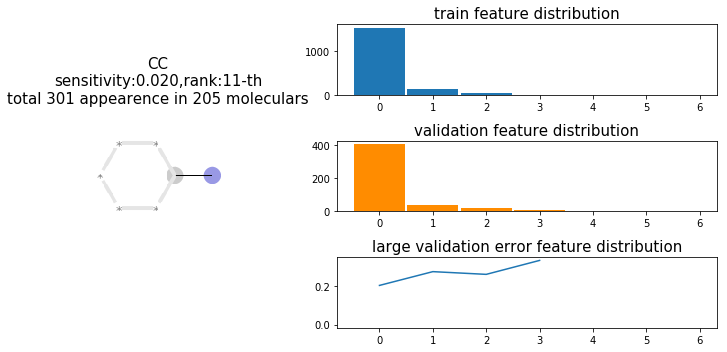

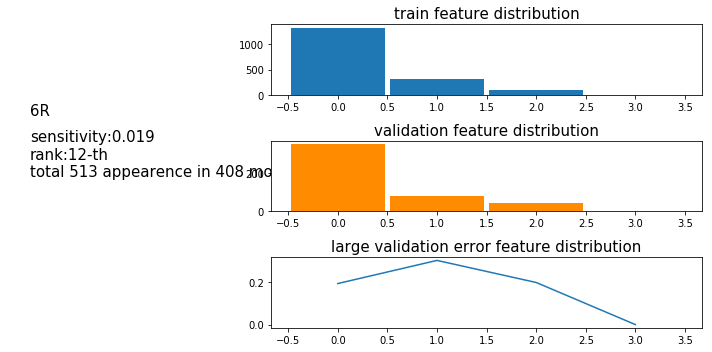

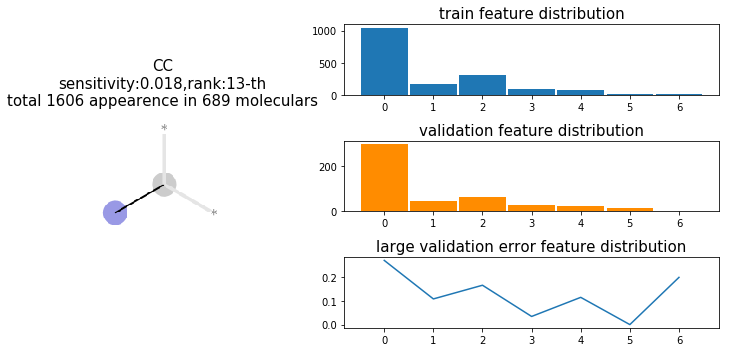

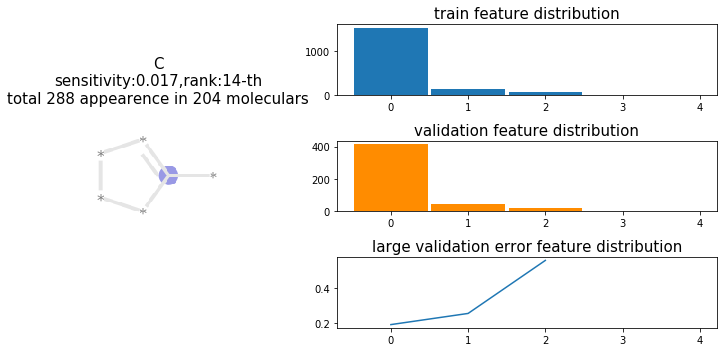

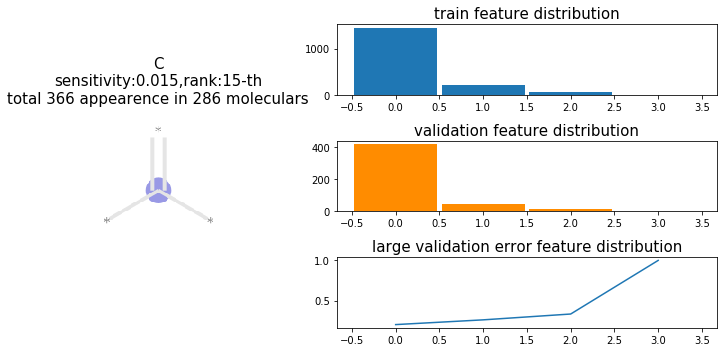

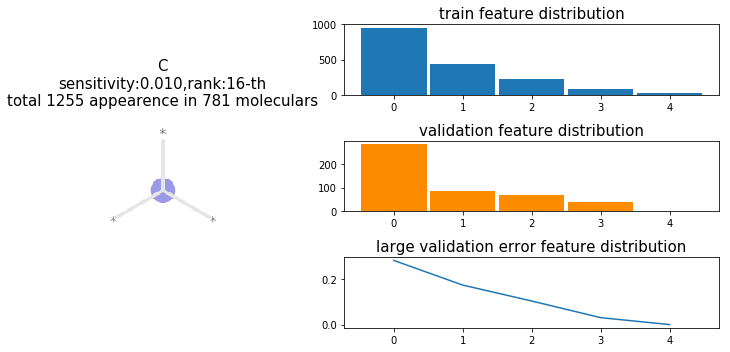

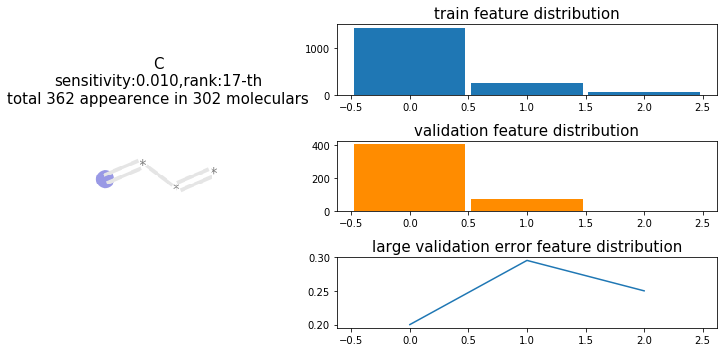

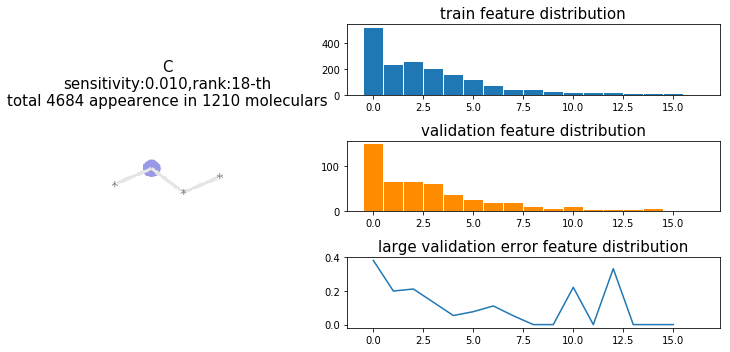

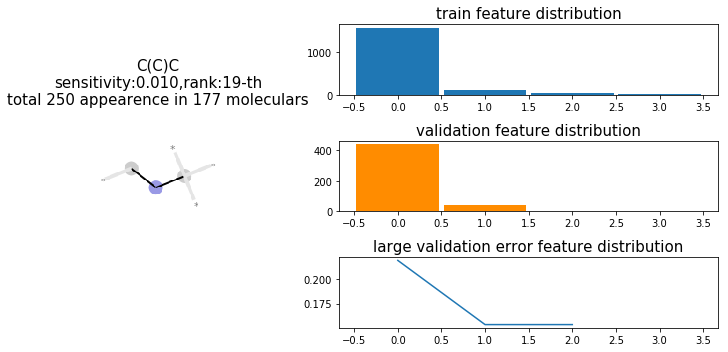

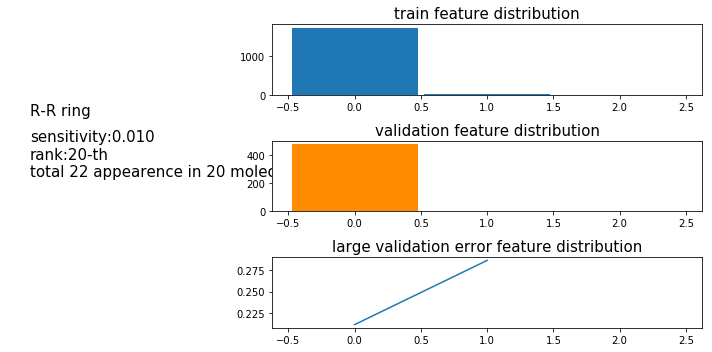

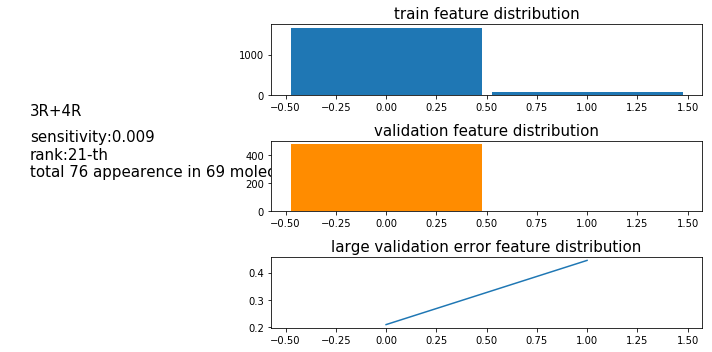

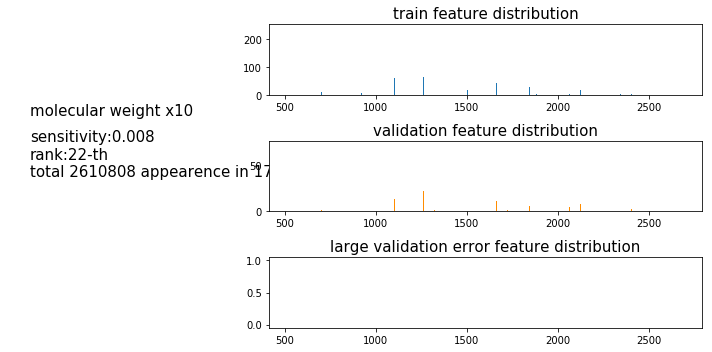

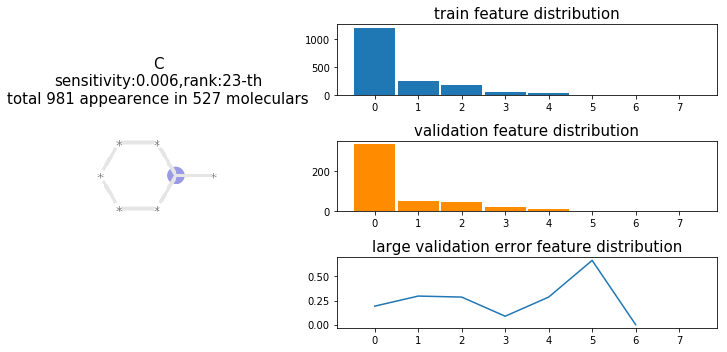

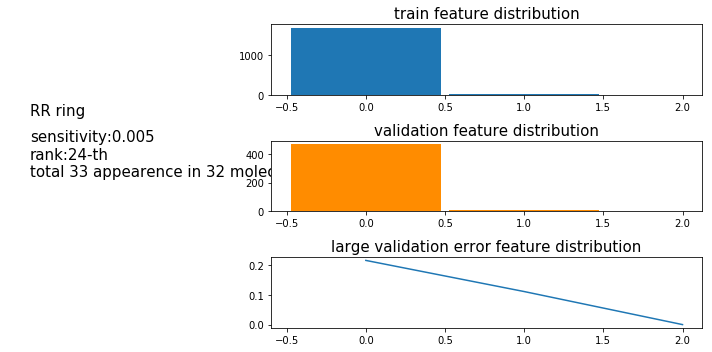

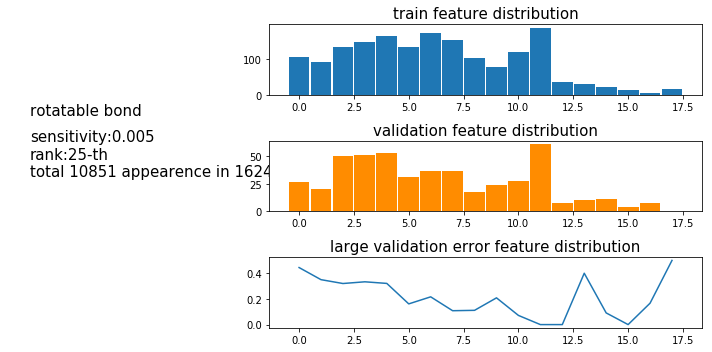

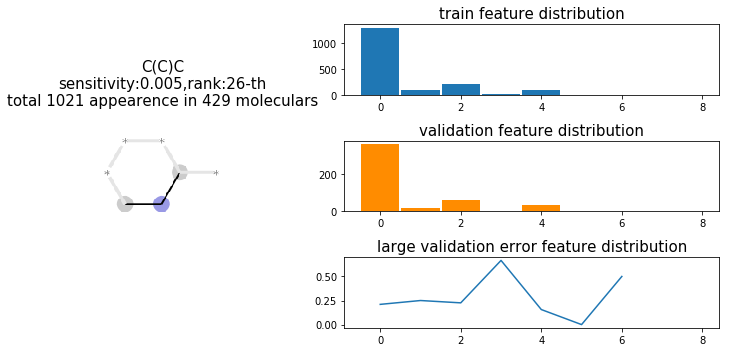

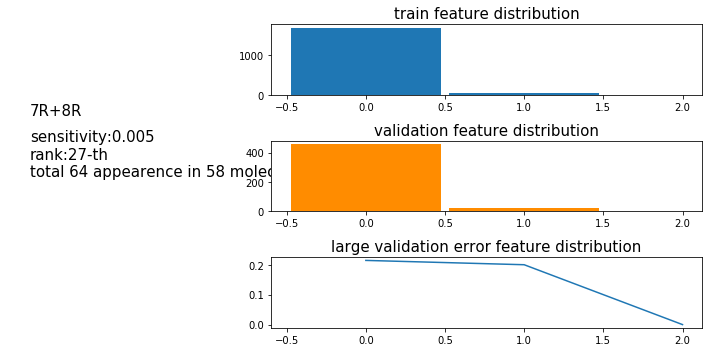

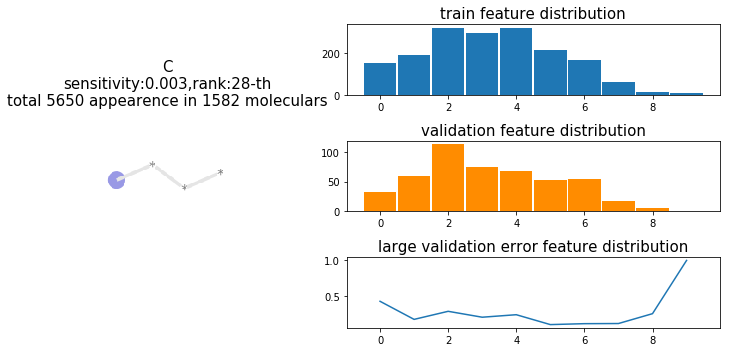

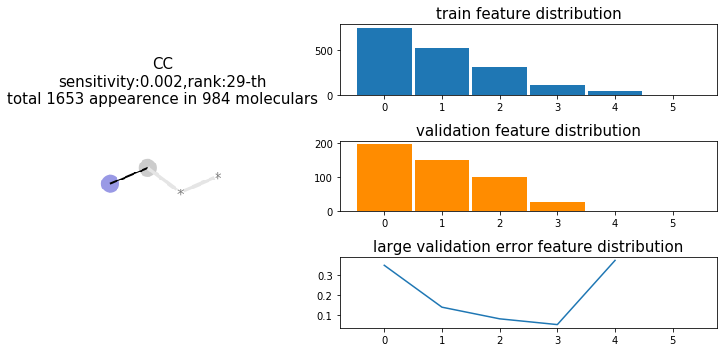

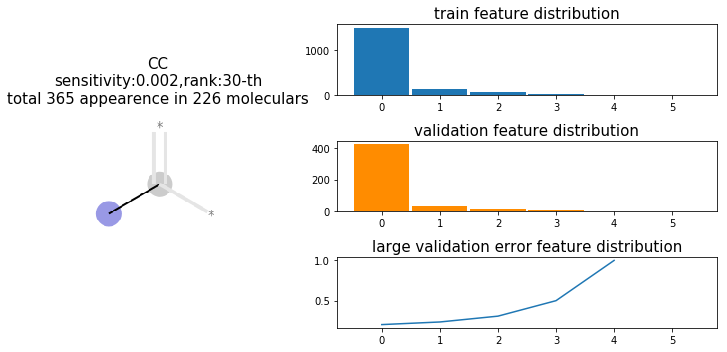

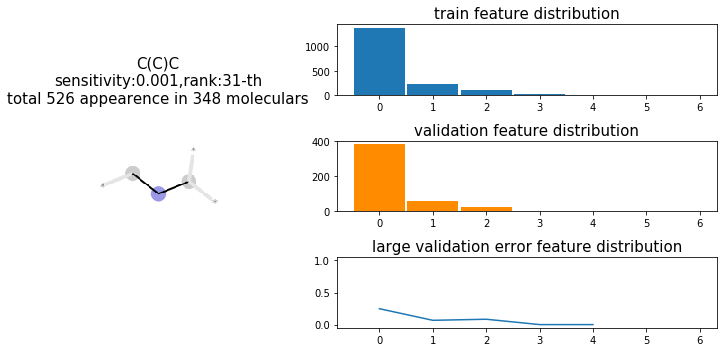

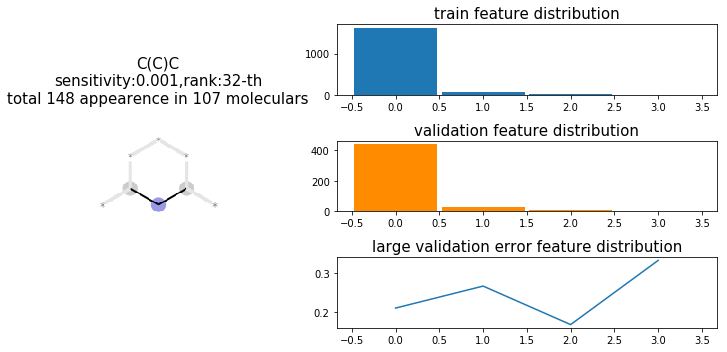

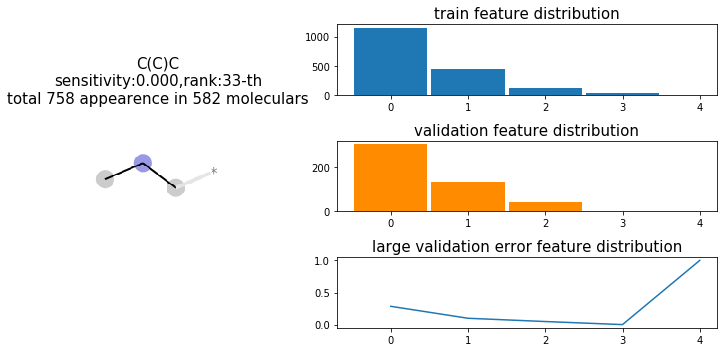

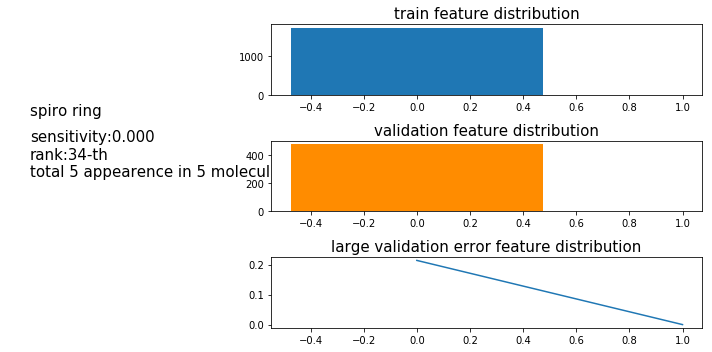

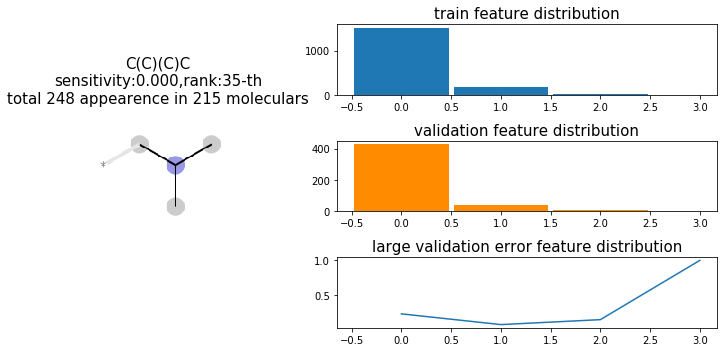

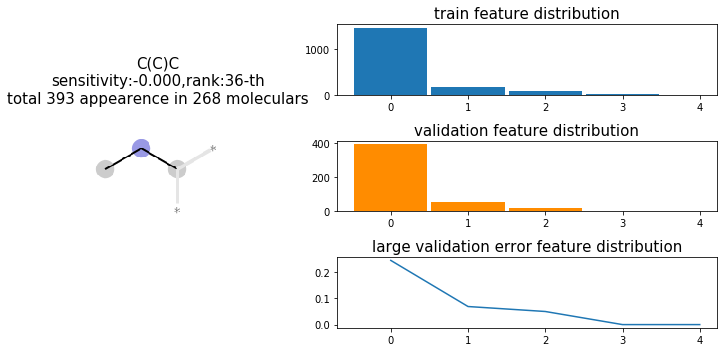

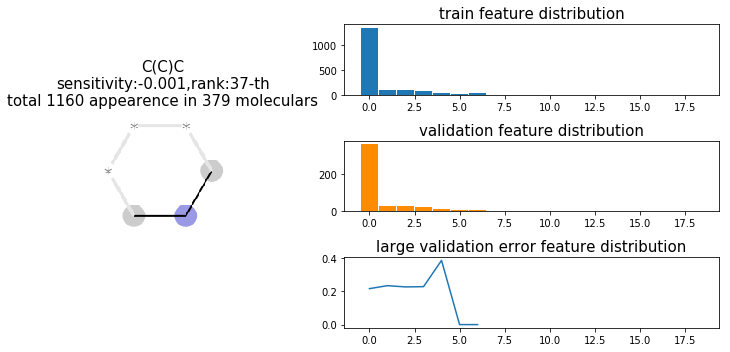

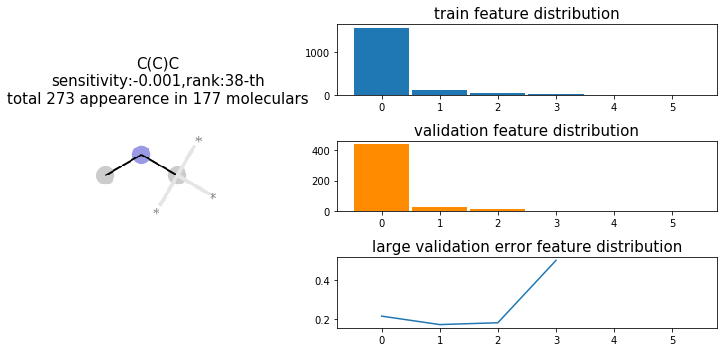

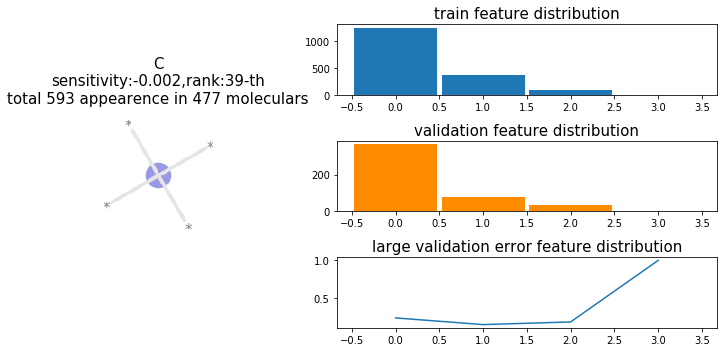

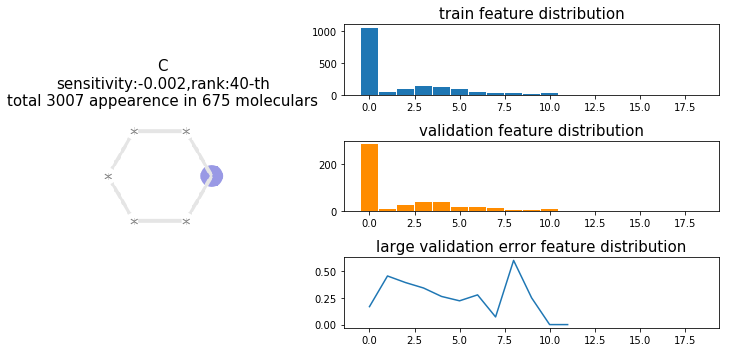

In [68]:
for i in range(1,41):
    feature_card(i,sobol_idx, sobol_S1,fp_svgs,unique_trainx, unique_bad_validx, unique_validx)

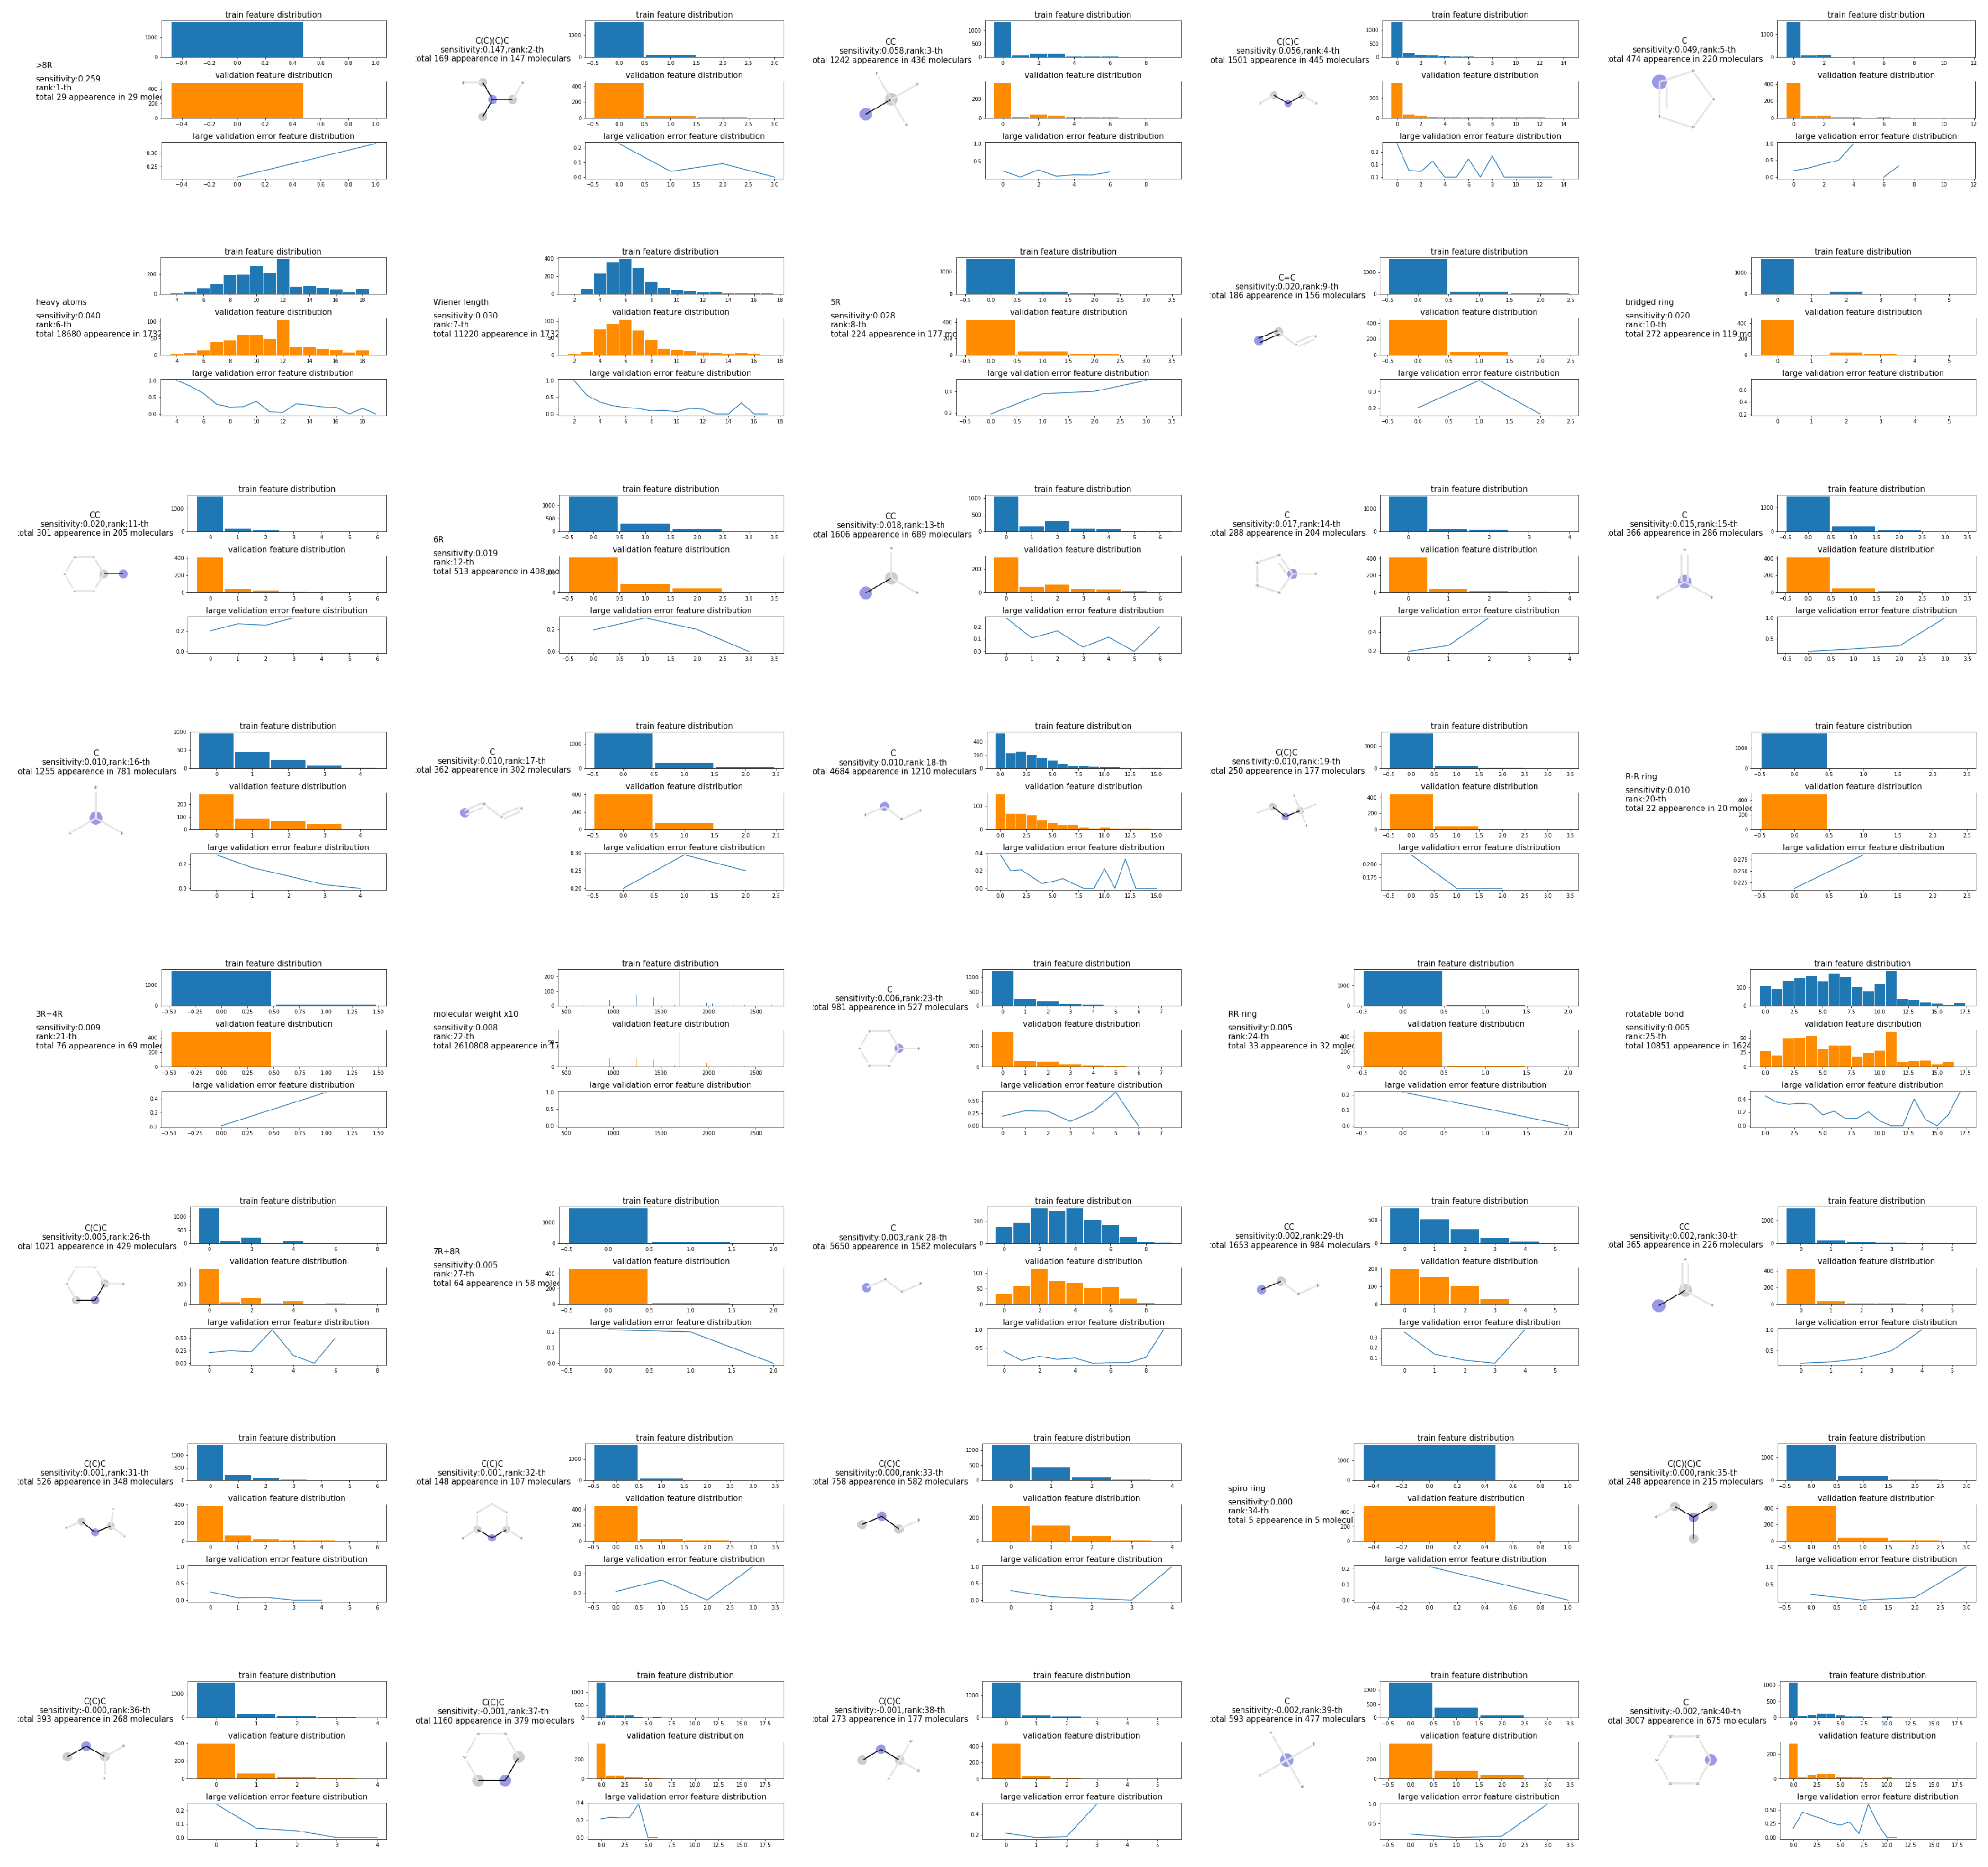

In [69]:
feature_files = sorted(list(os.listdir('./png')))
feature_files.remove('all.png')
fig = plt.figure(figsize=(5*10,8*(5+1)))
for i in range(40):
    ax = fig.add_subplot(8,5,i+1)
    temp = mpimg.imread('png/'+feature_files[i])
    ax.axis('off')
    ax.imshow(temp)
fig.tight_layout()
fig.savefig('png/all.png')

### stash

In [20]:
a1.hist(unique_trainx[:,10],bins=10)
unique, counts = np.unique(unique_trainx[:,10], return_counts=True)
total = sum(counts)
unique_dict = defaultdict(lambda x: 0, zip([int(i) for i in unique], counts))
feature_freq_mat = np.array([[unique_dict[i]/total for i in range(int(min(unique))+1,int(max(unique)))]])

a1.scatter(unique_trainx[:,idx],[1 for i in range(unique_trainx.shape[0])],alpha=0.05)

NameError: name 'a1' is not defined

In [ ]:
feature_files = sorted(list(os.listdir('./png')))

In [ ]:
feature_files